# University Recommender system

# Objective 
* Following Recommender system suggest that whether university admitted student or not based on information avilable 



In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model, svm, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt

In [174]:
df = pd.read_csv(r'G:/Assignment_NTL/Data/EnrollmentData.csv')
df.head()

,Academic Period,Unique ID,State Province,Student Population,Application Date,Admissions Population Description,Residency Description,College Description,Major Description,Gender,...,Common Application,College Online Application,Common Application Upload,College Paper Application,Pre-Dental,Pre-Law,Pre-Med,Pre-Veterinarian,Admitted,Enrolled
0,200640,51954735,NJ,F,13-Sep-05,Early Action,Live on-campus (Resident),Arts and Science,Elementary Education,Female,...,0,1,0,0,0,0,0,0,Admitted,Enrolled
1,200640,51937025,PA,F,13-Sep-05,Early Action,Live on-campus (Resident),Arts and Science,English,Female,...,0,1,0,0,0,0,0,0,Admitted,Not enrolled
2,200640,51953900,PA,F,13-Sep-05,Early Action,Live on-campus (Resident),Arts and Science,Undecided Natural Science,Female,...,1,0,0,0,0,0,0,0,Admitted,Not enrolled
3,200640,51954245,PA,F,13-Sep-05,Early Action,Live on-campus (Resident),Arts and Science,Undeclared Social Science,Female,...,1,0,0,0,0,0,0,0,Admitted,Not enrolled
4,200640,51954500,PA,F,13-Sep-05,Early Action,Live on-campus (Resident),School of Business,Marketing,Male,...,0,1,0,0,0,0,0,0,Admitted,Enrolled


In [175]:
df.dtypes,df.columns

(Academic Period                        int64
 Unique ID                              int64
 State Province                        object
 Student Population                    object
 Application Date                      object
 Admissions Population Description     object
 Residency Description                 object
 College Description                   object
 Major Description                     object
 Gender                                object
 High School GPA                      float64
 Act English                          float64
 Act Math                             float64
 Act Reading                          float64
 Act Science Reasoning                float64
 Act Composite                        float64
 Sat Verbal                           float64
 Sat Mathematics                      float64
 Sat Total Score                      float64
 Institutional Aid Offered            float64
 Class Rank                           float64
 Class Size                       

# Null and Duplicate values in Data

In [176]:
# gives some infomation on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
print ('-' * 10 + " Display information about column types and number of null values " +
       '-' * 10 )

print(display(tab_info))

---------- Display information about column types and number of null values ----------


,Academic Period,Unique ID,State Province,Student Population,Application Date,Admissions Population Description,Residency Description,College Description,Major Description,Gender,...,Common Application,College Online Application,Common Application Upload,College Paper Application,Pre-Dental,Pre-Law,Pre-Med,Pre-Veterinarian,Admitted,Enrolled
column type,int64,int64,object,object,object,object,object,object,object,object,...,int64,int64,int64,int64,int64,int64,int64,int64,object,object
null values (nb),0,0,491,0,0,1360,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,1.2449,0,0,3.44819,0,0,0,0.0228189,...,0,0,0,0,0,0,0,0,0,0


None


In [177]:
print('Duplicate data entries: {}'.format(df.duplicated().sum()))

Duplicate data entries: 0


* No Duplicate Value found and Many Features has significant Null Values 
* uniqueID has no relevance 
* Class Rank,Class Size,Class Rank Percentile has more than 81% Missing value better to drop
* Pre-Veterinarain Has only one category,please drop

In [178]:
drop_col = ['Unique ID','Class Rank','Class Size','Class Rank Percentile','Pre-Veterinarian']
df.drop(drop_col,axis =1 ,inplace = True)

* Datetime Feature Extraction using year,month

In [179]:
df['Academic Period_year'] =  pd.Series(df['Academic Period'], index = df.index)
df['Academic Period_year'] = df['Academic Period'].apply(lambda x : x//100)
df.drop('Academic Period',axis=1,inplace=True)

In [180]:
def get_year(x):
    if x is not None and type(x) is not float:
        try:
            return dt.strptime(x, '%d-%b-%y').year
        except ValueError:
            return dt.strptime(x, '%d-%b-%y %H:%M:%S').year
    else:
        return None
    pass

In [181]:
def get_month(x):
    if x is not None and type(x) is not float:
        try:
            return dt.strptime(x,'%d-%b-%y').month
        except ValueError:
            return dt.strptime(x,'%d-%m-%y %H:%M:%S').month
    else:
        return None
    pass

In [182]:
df['Application_year'] = pd.Series(df['Application Date'], index = df.index)
df['Application_month'] = pd.Series(df['Application Date'], index = df.index)
df.Application_year = df['Application Date'].apply(lambda x : get_year(x))
df.Application_month = df['Application Date'].apply(lambda x : get_month(x))
df.drop('Application Date',axis =1 ,inplace = True)

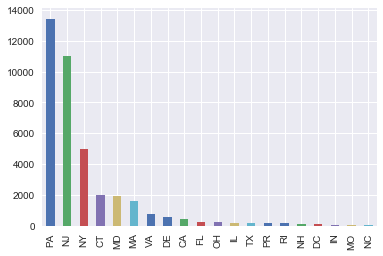

In [183]:
s= df['State Province'].value_counts()[:20]
s.plot.bar()
plt.show()

* Dropping Major Description Features Looks like its has less relevance 

Top 20 State addmission wise , Pennsylvania has highest no addmision Application filled

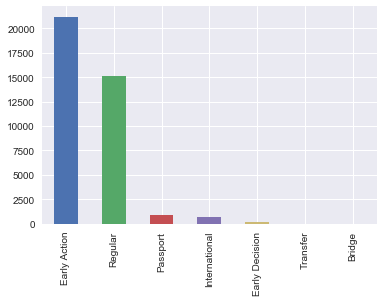

In [184]:
s= df['Admissions Population Description'].value_counts()
s.plot.bar()
plt.show()

* As We can see that Tranfer and Bridge has only 2 and 1 data point respectively so better to remove this two features
* Setting class thresholds

In [185]:
Admission_Populatio_drop = df[(df['Admissions Population Description']=='Transfer') | (df['Admissions Population Description']=='Bridge')]

In [186]:
df.drop(Admission_Populatio_drop.index, axis=0,inplace=True)

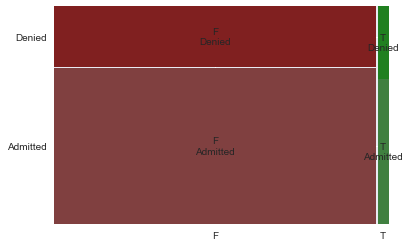

In [187]:
data = df[['Student Population','Admitted']]
mosaic(data,['Student Population','Admitted']);

As We can observed that Most of students are Full time but Application rejection in Full time student are high compare to Transfer Student.

In [188]:
df['Residency Description'].value_counts()

Live on-campus (Resident)    38409
Commuter                       952
Undeclared                      66
Local Community                  5
Local Community                  3
International                    3
Name: Residency Description, dtype: int64

* Minority Class Converting in one class

In [189]:
df['Residency Description'].replace(to_replace='International', value='other', regex=True,inplace=True);
df['Residency Description'].replace(to_replace='Undeclared', value='other', regex=True,inplace=True);
df['Residency Description'].replace(to_replace='Local Community', value='other', regex=True,inplace=True);
df['Residency Description'].replace(to_replace='Local Community ', value= 'other', regex=True,inplace=True);
df_drop = df[df['Residency Description']=='other ']
df.drop(df_drop.index, axis=0,inplace=True)


# Gender-Wise Distribtutions

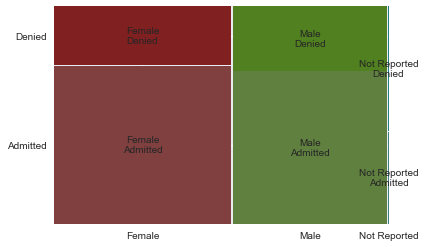

In [190]:
data = df[['Gender','Admitted']]
mosaic(data,['Gender','Admitted']);

!!! Prefect Distribution with This Features Male & Female have almost same ratio of Addmission and Addmission

# Outlier Detection in GPA grade

In [191]:
print("Total Percent in Null values in Grades",(df['High School GPA'].isnull().sum()/df.shape[0])*100)

Total Percent in Null values in Grades 8.657723226739025


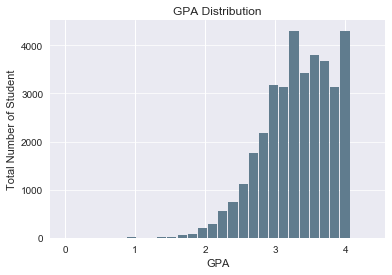

In [192]:
GPA = pd.Series(df['High School GPA'])
GPA.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Total Number of Student')
plt.grid(axis='y', alpha=0.75)

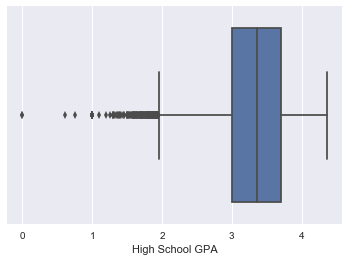

In [193]:
sns.boxplot(x=df['High School GPA'])

In [194]:
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    iqr_low  = q1-1.5*iqr
    iqr_high = q3+1.5*iqr
    df = df.loc[(df[col_name] > iqr_low) & (df[col_name] < iqr_high)]
    return df

In [195]:
df = remove_outlier(df,'High School GPA')

In [196]:
GPA_median = df['High School GPA'].median()

~ 9% values are Null so we can impute this columns with Median of Grade

In [197]:
df['High School GPA'].fillna(GPA_median,inplace=True)
df['High School GPA'].isnull().sum()

0

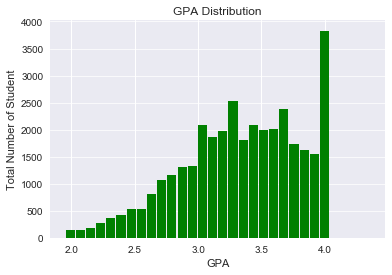

In [198]:
GPA = pd.Series(df['High School GPA'])
GPA.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='green')
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Total Number of Student')
plt.grid(axis='y', alpha=0.75)

Grade Distribution looks fine !! No Need to perfromed Transformation For normal Distribution

# Institute Aid offer : US University Assist Student Financially
* Check for Null values

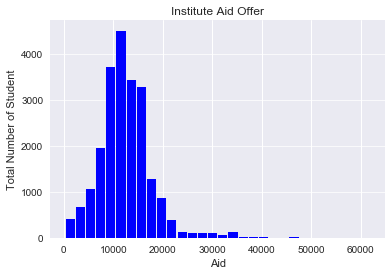

In [199]:
GPA = pd.Series(df['Institutional Aid Offered'])
GPA.plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='blue')
plt.title('Institute Aid Offer')
plt.xlabel('Aid')
plt.ylabel('Total Number of Student')
plt.grid(axis='y', alpha=0.75)

* Data looks normally distributed and skewed

In [200]:
print("Total Null Values {:.2f}%".format(df['Institutional Aid Offered'].isnull().sum()/df.shape[0]*100))

Total Null Values 37.74%


* ~38 % Value is missing , which mean either data is not recorded or student not apply for aid or not qualified for that.
* Let's Check for how much % Student apply for Any kind financial assistance and data is missing 

In [201]:
print(" Total null values where student not apply for any aid and also didn't get aid {:.2f}%".format(df[(df['Institutional Aid Offered'].isnull()==True) & (df['Need-Based Financial Aid']==0) & (df['Merit-Based Financial Aid']==0)].shape[0]/df[(df['Institutional Aid Offered'].isnull() ==True)].shape[0]*100))

 Total null values where student not apply for any aid and also didn't get aid 88.08%


* Point Note from Here is In The Missing Values of above feature ~88% values are those values in which student did no
  apply for any kind of Aid Which mean data is not available
* Fiiling missing value with 0 is best option

In [202]:
df['Institutional Aid Offered'].fillna(0,inplace = True)

# Sport, Enrollment & Financial Aid Relationship

In [203]:
data = df[['Admissions Athlete','Enrolled']]

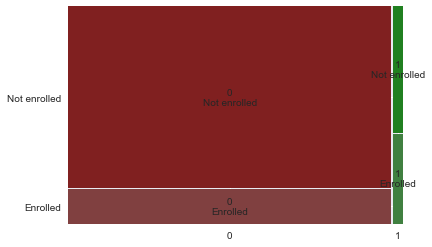

In [204]:
mosaic(data,['Admissions Athlete','Enrolled']);

Note
* ~5-10% Student has applied for Athlete addmission
* ~ 50 % Get addmission in univerity

* Financial Help 

In [205]:
print("Total No Student who applied Need- Based Financial aid is {}".format
      (df[(df['Need-Based Financial Aid'])==1].shape[0]))

Total No Student who applied Need- Based Financial aid is 8587


In [206]:
print("Total No Student who applied Merit-Based Financial Aid is {}".format
      (df[(df['Merit-Based Financial Aid'])==1].shape[0]))

Total No Student who applied Merit-Based Financial Aid is 8392


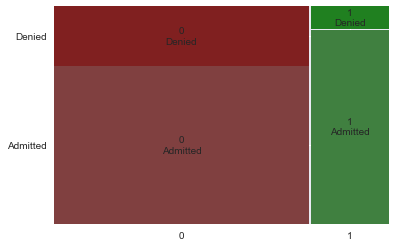

In [207]:
data = df[['Merit-Based Financial Aid','Admitted']]
mosaic(data,['Merit-Based Financial Aid','Admitted']);

# ACT and SAT Score Feature Engineering

Note
* Student should appear in one of Entrance Exam or student can appear in both exams
* Addmission should based on Your score of entrance exam


How Strategy Works
* PCA is Best Technique For reducing Dim
* Applying PCA into All score
* Choose most explained PCA component

# PCA Analysis

In [208]:
indi_subject = ['Act English','Act Math','Act Reading','Act Science Reasoning','Sat Verbal','Sat Mathematics','Act Composite','Sat Total Score']

In [209]:
df1 = df[indi_subject]
df1.fillna(0,inplace=True)
scaler = StandardScaler()
scaler.fit(df1)
scaled_data =scaler.transform(df1)

In [210]:
pca = PCA()
pca.fit(scaled_data)
#x_pca = pca.transform(scaled_data)
for i in range (0,len(pca.explained_variance_ratio_.cumsum())):
    print("Explained variance with {} component is {:.2f}%".format((i+1),pca.explained_variance_ratio_.cumsum()[i]*100))

Explained variance with 1 component is 64.82%
Explained variance with 2 component is 92.63%
Explained variance with 3 component is 96.00%
Explained variance with 4 component is 97.99%
Explained variance with 5 component is 99.58%
Explained variance with 6 component is 99.83%
Explained variance with 7 component is 99.95%
Explained variance with 8 component is 100.00%


* https://etav.github.io/python/scikit_pca.html (For PCA graph)

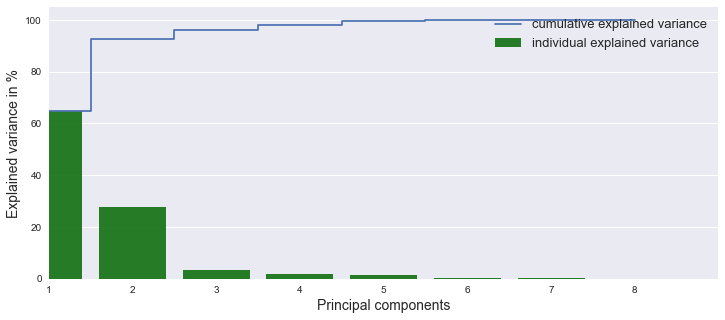

In [211]:

fig, ax = plt.subplots(figsize=(12, 5))
sns.set(font_scale=1)
plt.step(range(scaled_data.shape[1]), (pca.explained_variance_ratio_.cumsum()*100), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,scaled_data.shape[1]+1), (pca.explained_variance_ratio_*100), alpha=0.9, color = 'g',
            label='individual explained variance',ax=ax)

plt.xlim(0, 8)
plt.ylabel('Explained variance in %', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper right', fontsize = 13);
plt.show();


# Result of PCA 
* 3 component of PCA can able to explain around ~ $97$% variance so best seletion of component is either 2 or 3.

In [212]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [213]:
x_pca = pd.DataFrame(x_pca,columns=['Score1','score2','score3'])
df = df.join(x_pca,how='outer')

In [214]:
# Removing all ACT and SAT Score
df.drop(indi_subject,axis=1,inplace=True)

Comment
* We delete the all $3$ other Score Columns which can expalin 97% var of ACT and SAT score
* Add Another Column Score which has standard Score

# Checking Predictor class Balance

In [215]:
a =df['Admitted'].value_counts()
print(a)

Admitted    27391
Denied       8383
Name: Admitted, dtype: int64


In [216]:
print("Total Admitted Class is {}".format(a['Admitted']/(a['Admitted']+a['Denied'])*100))

Total Admitted Class is 76.56678034326606


In [217]:
print("Total Denied Class is {}".format(a['Denied']/(a['Admitted']+a['Denied'])*100))

Total Denied Class is 23.433219656733943


In [218]:
print('Proportion:', round(a[0] / a[1], 2), ': 1')

Proportion: 3.27 : 1


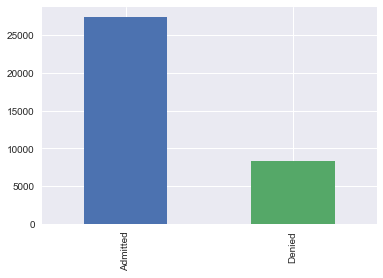

In [219]:
a.plot.bar()

# Class Imbalance Comments
* As we can  observe Proportion is $3.2$:$1$
* So i don't observe any class imbalace problem(Condition apply)

# Correlation and Heat Map
# label Encoding

In [220]:
encoder = LabelEncoder()

In [221]:
df['State Province'] = encoder.fit_transform(df['State Province'].astype('str'))
df['Admitted'] = encoder.fit_transform(df['Admitted'].astype('str'))
df['Enrolled'] = encoder.fit_transform(df['Enrolled'].astype('str'))
df['Gender'] = encoder.fit_transform(df['Gender'].astype('str'))
df['Residency Description'] = encoder.fit_transform(df['Residency Description'].astype('str'))
df['College Description'] = encoder.fit_transform(df['College Description'].astype('str'))
df['Admissions Population Description'] = encoder.fit_transform(df['Admissions Population Description'].astype('str'))
df['Student Population'] = encoder.fit_transform(df['Student Population'].astype('str'))

In [222]:
corr = df.corr()

* https://seaborn.pydata.org/generated/seaborn.heatmap.html (Drawing Heat map)

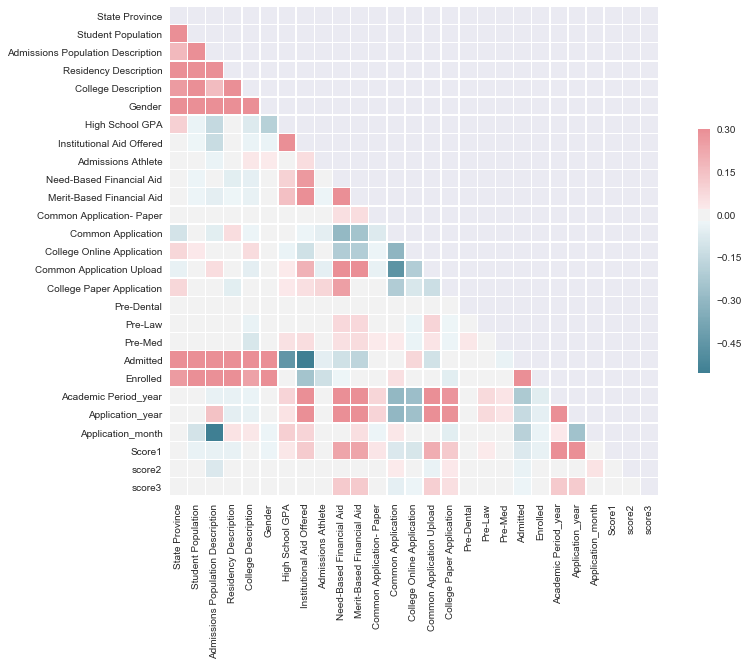

In [223]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,linecolor='white',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Checking output correlation

Notes
* Application Year has High Correlation with many Columns, so better to drop
* Drop Merit based Financial Aid has High Correlation with Financial based

In [224]:
df.isnull().sum()
# Dropping all null values
df.dropna(inplace=True)

In [225]:
Feature_drop = ['Academic Period_year','Merit-Based Financial Aid','Major Description']

In [226]:
df.drop(Feature_drop,axis =1 ,inplace=True)

# Model Building

* Selection of independent variable and dependent variable

In [227]:
# Dependent Variable selectio
Y = np.array(df['Admitted'])

In [228]:
# Indpendent variable
Z = df
Z.drop('Admitted',axis=1,inplace =True)
X  = np.array(Z)

# Test Train Split

In [229]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=27)

# decision Tree Classifier

In [230]:
tree = DecisionTreeClassifier(random_state = 27)
tree.fit(x_train,y_train)
pred_holdout = tree.predict(x_test)
print(" Accuarcy of Decision Tree",accuracy_score(y_test,pred_holdout)*100,'%')

 Accuarcy of Decision Tree 90.7289384584744 %


* https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/ ( Help for model optimization)

In [231]:
params = {'max_depth':np.arange(2,11),'min_samples_leaf':np.arange(2,11)}
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state = 27)
best_tree = GridSearchCV(tree,param_grid=params,cv=5,n_jobs=-1,verbose=1)  # K=5, all job will run in parallel(use of all CPU core)

In [232]:
best_tree.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 343 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   21.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=27,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [172]:
print(" Accuracy using K-fold Validaation {:.2f}%".format(np.mean(best_tree.best_score_*100)))

 Accuracy using K-fold Validaation 92.50%


In [140]:
print(best_tree.best_params_) #{'max_depth': 6, 'max_features': 17}

{'max_depth': 9, 'min_samples_leaf': 10}


# Learning curve defination

* https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html ( Help for Drawaing Leaning Curve)

In [141]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

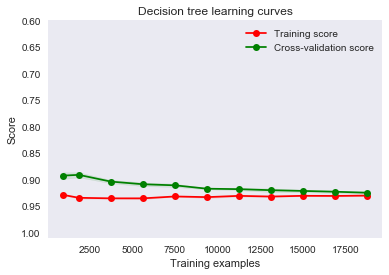

In [142]:
g = plot_learning_curve(best_tree.best_estimator_,
                        "Decision tree learning curves", x_train, y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

# Classfication Report of decision tree

In [144]:
print("The Acccuary is {:.2f}%".format(accuracy_score(y_test, best_tree.predict(x_test))*100))
print ("Confusion matrix report")
print(confusion_matrix(y_test, best_tree.predict(x_test)))
print(classification_report(y_test, best_tree.predict(x_test)))



The Acccuary is 92.89%
Confusion matrix report
[[7310  405]
 [ 309 2018]]
             precision    recall  f1-score   support

          0       0.96      0.95      0.95      7715
          1       0.83      0.87      0.85      2327

avg / total       0.93      0.93      0.93     10042



* On this curve, we can see that the train and cross-validation curves converge towards the same limit when the sample size increases. This is typical of modeling with low variance and proves that the model does not suffer from overfitting. Also, we can see that the accuracy of the training curve is correct which is synonymous of a low bias. Hence the model does not underfit the data.

# Random Forest Classification

In [237]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print("Accuracy is {:.2f} %".format(np.mean(cross_val_score(forest, x_train, y_train, cv=5))*100))

Accuracy is 92.22 %


In [238]:
forest_params = {'max_depth': range(6, 12),
                 'max_features': range(4, 19)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(x_train, y_train)

forest_grid.best_params_, forest_grid.best_score_ # ({'max_depth': 9, 'max_features': 6}, 0.951)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 11.2min finished


({'max_depth': 10, 'max_features': 12}, 0.9281263337601365)

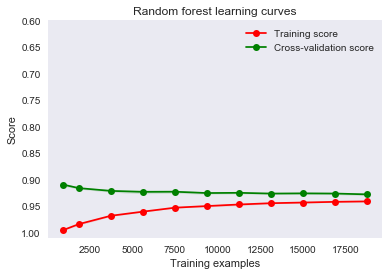

In [240]:
g = plot_learning_curve(forest_grid.best_estimator_,
                        "Random forest learning curves", x_train, y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

* On this curve, we can see that the train and cross-validation curves converge towards the same limit when the sample size increases. This is typical of modeling with low variance and proves that the model does not suffer from overfitting. Also, we can see that the accuracy of the training curve is correct which is synonymous of a low bias. Hence the model does not underfit the data.

# Classification report of Random forest

In [248]:
print("The Acccuary is {:.2f}%".format(accuracy_score(y_test, forest_grid.predict(x_test))*100))
print ("Confusion matrix report")
RF_con = confusion_matrix(y_test, forest_grid.predict(x_test))
print("total number of correct prediction {} out of {}".format((RF_con[0][0]+RF_con[1][1]),RF_con.sum()))
print("\n")
print(confusion_matrix(y_test, forest_grid.predict(x_test)))
print("\n")
print(classification_report(y_test, forest_grid.predict(x_test)))

The Acccuary is 93.25%
Confusion matrix report
total number of correct prediction 9364 out of 10042


[[7298  417]
 [ 261 2066]]


             precision    recall  f1-score   support

          0       0.97      0.95      0.96      7715
          1       0.83      0.89      0.86      2327

avg / total       0.93      0.93      0.93     10042



# Logistic Regression

In [582]:
logreg=LogisticRegression()
grid={"C":np.logspace(-3,3,10), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(logreg,grid,cv=10,n_jobs=-1,verbose=1)
logreg_cv.fit(x_train,y_train)
logreg_cv.best_params_, logreg_cv.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   29.0s finished


({'C': 0.1, 'penalty': 'l1'}, 0.9032863849765258)

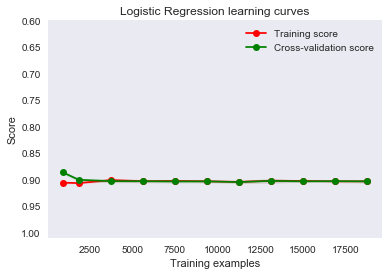

In [583]:
g = plot_learning_curve(logreg_cv.best_estimator_,
                        "Logistic Regression learning curves", x_train, y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

# Classification Report of Logistic Regression

In [584]:
print("The Acccuary is {:.2f}%".format(accuracy_score(y_test, logreg_cv.predict(x_test))*100))
print ("Confusion matrix report")
LR_con = confusion_matrix(y_test, logreg_cv.predict(x_test))
print("total number of correct prediction {} out of {}".format((LR_con[0][0]+LR_con[1][1]),LR_con.sum()))
print("\n")
print(confusion_matrix(y_test, logreg_cv.predict(x_test)))
print("\n")
print(classification_report(y_test, logreg_cv.predict(x_test)))

The Acccuary is 90.97%
Confusion matrix report
total number of correct prediction 9135 out of 10042


[[7243  472]
 [ 435 1892]]


             precision    recall  f1-score   support

          0       0.94      0.94      0.94      7715
          1       0.80      0.81      0.81      2327

avg / total       0.91      0.91      0.91     10042



# Support Vector Machine classifier

In [585]:
svc = LinearSVC()
grid={"C":np.logspace(-3,3,10)}
svm_cv=GridSearchCV(svc,grid,cv=5,n_jobs=-1,verbose=1)
svm_cv.fit(x_train,y_train)
svm_cv.best_params_, svm_cv.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


({'C': 2.154434690031882}, 0.8286384976525821)

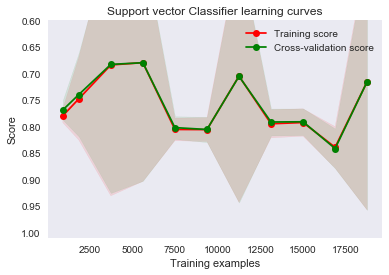

In [586]:
g = plot_learning_curve(svm_cv.best_estimator_,
                        "Support vector Classifier learning curves", x_train, y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

# Support vector Classifier Report

In [587]:
print("The Acccuary is {:.2f}%".format(accuracy_score(y_test, svm_cv.predict(x_test))*100))
print ("Confusion matrix report")
SV_con = confusion_matrix(y_test, svm_cv.predict(x_test))
print("total number of correct prediction {} out of {}".format((SV_con[0][0]+SV_con[1][1]),SV_con.sum()))
print("\n")
print(confusion_matrix(y_test, svm_cv.predict(x_test)))
print("\n")
print(classification_report(y_test, svm_cv.predict(x_test)))

The Acccuary is 90.04%
Confusion matrix report
total number of correct prediction 9042 out of 10042


[[7174  541]
 [ 459 1868]]


             precision    recall  f1-score   support

          0       0.94      0.93      0.93      7715
          1       0.78      0.80      0.79      2327

avg / total       0.90      0.90      0.90     10042



# AdaBoost Classifier

In [588]:
ada = AdaBoostClassifier()
grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada_cv=GridSearchCV(ada,grid,cv=10,n_jobs=-1,verbose=1)
ada_cv.fit(x_train,y_train)
ada_cv.best_params_, svm_cv.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


({'n_estimators': 50}, 0.8286384976525821)

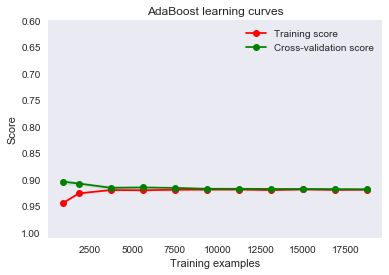

In [589]:
g = plot_learning_curve(ada_cv.best_estimator_,
                        "AdaBoost learning curves", x_train, y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

# Adaboost Classifier Report

In [590]:
print("The Acccuary is {:.2f}%".format(accuracy_score(y_test, ada_cv.predict(x_test))*100))
print ("Confusion matrix report")
ada_con = confusion_matrix(y_test, ada_cv.predict(x_test))
print("total number of correct prediction {} out of {}".format((ada_con[0][0]+ada_con[1][1]),ada_con.sum()))
print("\n")
print(confusion_matrix(y_test, ada_cv.predict(x_test)))
print("\n")
print(classification_report(y_test, ada_cv.predict(x_test)))

The Acccuary is 92.51%
Confusion matrix report
total number of correct prediction 9290 out of 10042


[[7325  390]
 [ 362 1965]]


             precision    recall  f1-score   support

          0       0.95      0.95      0.95      7715
          1       0.83      0.84      0.84      2327

avg / total       0.93      0.93      0.93     10042



# XG Boost Classifier

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html (Understanding XG Boost)

In [62]:
parameters = {
    "learning_rate": [ 0.1, 0.2],
    "min_samples_leaf": np.arange(3,10),
    "max_depth":np.arange(3,10),
    "n_estimators":[10]
    }



In [63]:
XGB = GradientBoostingClassifier()
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,verbose=1)

In [64]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:  3.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.2], 'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]), 'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'n_estimators': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

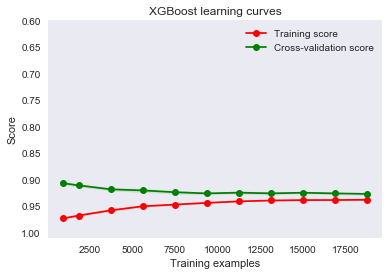

In [66]:
g = plot_learning_curve(clf.best_estimator_,
                        "XGBoost learning curves", x_train, y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

# XG Boost Classification Report

In [71]:
print("The Acccuary is {:.2f}%".format(accuracy_score(y_test, clf.predict(x_test))*100))
print ("Confusion matrix report")
xg_con = confusion_matrix(y_test, clf.predict(x_test))
print(xg_con)
print("total number of correct prediction {} out of {}".format((xg_con[0][0]+xg_con[1][1]),xg_con.sum()))
print("\n")
print(confusion_matrix(y_test, clf.predict(x_test)))
print("\n")
print(classification_report(y_test, clf.predict(x_test)))

The Acccuary is 93.28%
Confusion matrix report
[[7317  398]
 [ 277 2050]]
total number of correct prediction 9367 out of 10042


[[7317  398]
 [ 277 2050]]


             precision    recall  f1-score   support

          0       0.96      0.95      0.96      7715
          1       0.84      0.88      0.86      2327

avg / total       0.93      0.93      0.93     10042



# Let Vote All algorithms

In [256]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state = 27)#, n_folds=2, shuffle=False, random_state=seed)
    cv_results = cross_val_score(model, X, y=Y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)



LR: 87.849542 (0.390267)
CART: 90.102185 (0.408693)
AB: 91.945519 (0.202898)
GBM: 92.489250 (0.277606)
RF: 91.823026 (0.145374)


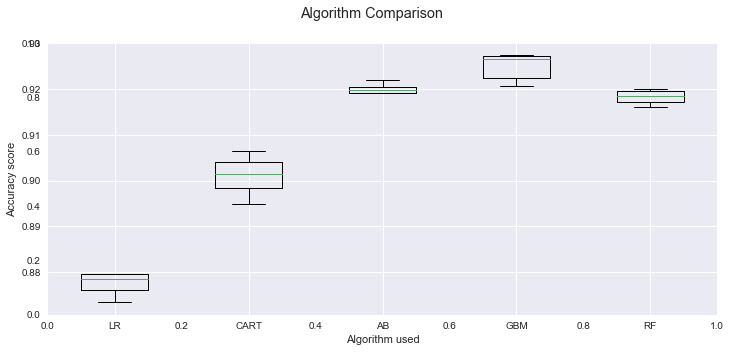

In [259]:
# Compare Algorithms
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111,)
plt.boxplot(results)

plt.xlabel("Algorithm used")
plt.ylabel("Accuracy score")
ax.set_xticklabels(names)
plt.show()

# Conclusion
* After Complete analysis we can conclude that random forest and gradient boosting has highest accuracy ~$93.5$% with grid search and cross fold     validation
* Tree Based Algorithms are Performing better compare to other algorithms
* Decision tree,Random Forest,XGBoost Algorithms.

# Finally !!!! Let's Make recommendation